In [3]:
# install module
!pip install pandas-visual-analysis

In [4]:
# Importing libarieries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Compelte EDA (Exploratory Data Analysis)

In [6]:
from pandas_visual_analysis import VisualAnalysis 

In [7]:
VisualAnalysis(data)

In [8]:
# checking the shape
data.shape

(891, 12)

In [9]:
# We need PassgengerId as input
data.drop('PassengerId', axis=1, inplace=True)
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Let's check how much women survived
women = data.loc[data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print("% of women who Survived:", rate_women)

% of women who Survived: 0.7420382165605095


#### We are more interested in survival of each passgenger or crew so, we can remove it and make a own seperate variable as outcome.
#### These outcome will be usead as prediction purpose.

In [11]:
# Storing a surival in outcome and remove from main dataset.
#outcomes = df['Survived']

# Dropping from dataset
#data = df.drop('Survived',axis=1)

In [12]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
# lets impute the missing values in the Training Data
data['Age'] = data['Age'].fillna(data['Age']).mode()[0]
data['Cabin']= data['Cabin'].fillna(data[ 'Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
 
# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", data.isnull().sum())

Number of Missing Values Left in the Training Data : Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [14]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.000000
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [16]:
from sklearn.preprocessing import LabelEncoder
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

In [17]:
data['Name'] = data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = data['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [18]:
data['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = data.Age[(data["Age"] != -1) & (data['Name'] == title)].median()
    medians[title] = median
    
for index, row in data.iterrows():
    if row['Age'] == -1:
        data.loc[index, 'Age'] = medians[row['Name']]

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,24.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,Mrs,0,24.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,24.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,Mrs,0,24.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,24.0,0,0,373450,8.0500,B96 B98,S


In [19]:
# Transform the titles to numeric values such that the magnitude has a somewhat linear relationship with survival Alongwith transformation, the values need to be scaled down since some models like Neural nets are very sensitive to data which is not properly scaled

replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}
data['Name'] = data['Name'].apply(lambda x: replacement.get(x))

from sklearn.preprocessing import StandardScaler
data['Name'] = StandardScaler().fit_transform(data['Name'].values.reshape(-1, 1))

In [20]:
data.head()[['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']]

,Pclass,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,3,24.0,1,0,A/5 21171,B96 B98,S
1,1,24.0,1,0,PC 17599,C85,C
2,3,24.0,0,0,STON/O2. 3101282,B96 B98,S
3,1,24.0,1,0,113803,C123,S
4,3,24.0,0,0,373450,B96 B98,S


In [21]:
data['Age'] = StandardScaler().fit_transform(data['Age'].values.reshape(-1, 1))

In [22]:
medians = dict()
for pclass in data['Pclass'].unique():
    median = data.Fare[(data["Fare"] != -1) & (data['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in data.iterrows():
    if row['Fare'] == -1:
        data.loc[index, 'Fare'] = medians[row['Pclass']]
data['Fare'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1, 1))

In [23]:
data['Pclass'] = StandardScaler().fit_transform(data['Pclass'].values.reshape(-1, 1))

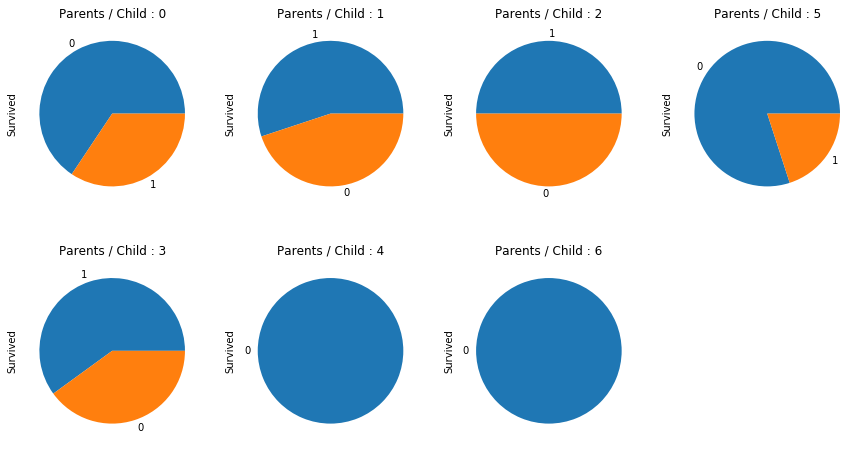

In [24]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in data['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    data.Survived[data['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [25]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
data['Parch'] = data['Parch'].apply(lambda x: replacement.get(x))
data['Parch'] = StandardScaler().fit_transform(data['Parch'].values.reshape(-1, 1))

In [26]:
data.drop('Ticket', axis=1, inplace=True)

In [27]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

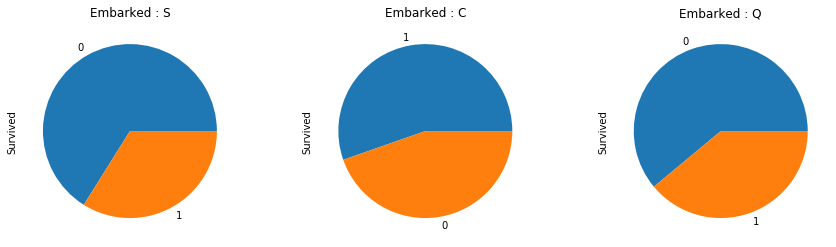

In [28]:
data['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in data['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    data.Survived[data['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1

In [29]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

data['Embarked'] = data['Embarked'].apply(lambda x: replacement.get(x))
data['Embarked'] = StandardScaler().fit_transform(data['Embarked'].values.reshape(-1, 1))
data.head()['Embarked']

0   -0.585954
1    1.942303
2   -0.585954
3   -0.585954
4   -0.585954
Name: Embarked, dtype: float64

In [30]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [31]:
replacement = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

data['SibSp'] = data['SibSp'].apply(lambda x: replacement.get(x))
data['SibSp'] = StandardScaler().fit_transform(data['SibSp'].values.reshape(-1, 1))
data.head()['SibSp']

0    1.576109
1    1.576109
2   -0.396241
3    1.576109
4   -0.396241
Name: SibSp, dtype: float64

In [32]:
data['Cabin'].fillna('U', inplace=True)
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
data['Cabin'].unique()

array(['B', 'C', 'E', 'G', 'D', 'A', 'F', 'T'], dtype=object)

In [33]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

data['Cabin'] = data['Cabin'].apply(lambda x: replacement.get(x))
data['Cabin'] = StandardScaler().fit_transform(data['Cabin'].values.reshape(-1, 1))
data.head()['Cabin']

0    0.139443
1   -2.099183
2    0.139443
3   -2.099183
4    0.139443
Name: Cabin, dtype: float64

In [34]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,0.0,1.576109,-0.468807,-0.502445,0.139443,-0.585954
1,1,-1.566107,1.537975,0,0.0,1.576109,-0.468807,0.786845,-2.099183,1.942303
2,1,0.827377,1.070922,0,0.0,-0.396241,-0.468807,-0.488854,0.139443,-0.585954
3,1,-1.566107,1.537975,0,0.0,1.576109,-0.468807,0.420730,-2.099183,-0.585954
4,0,0.827377,-0.797294,1,0.0,-0.396241,-0.468807,-0.486337,0.139443,-0.585954


In [35]:
from sklearn.model_selection import train_test_split
survived = data['Survived']
data.drop('Survived', axis=1, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(data, survived, test_size=0.2, random_state=42)

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
]

for model in models:
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(score )

0.8324022346368715
0.7988826815642458


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [40]:
# Let's save the model
import joblib

# Save the model in pickle file 
joblib.dump(model,'titanic.pkl')

['titanic.pkl']